# Capstone 2: Data Wrangling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import math

In [3]:
CURR_DIR = os.path.dirname(os.path.realpath('__file__'))
filenames = glob.glob(os.path.join(CURR_DIR, 'F500_2019/*.csv'))

data = []
for csv in filenames:
    frame = pd.read_csv(csv)
    frame['Ticker'] = os.path.basename(csv).replace('EOD-', '').replace('.csv','')
    data.append(frame)

In [4]:
bigframe = pd.concat(data, ignore_index=True)
bigframe['Datetime'] = pd.to_datetime(bigframe['Date'])
bigframe.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Ticker,Datetime
0,2020-05-08,305.64,310.35,304.2900,310.13,33511985.0,0.82,1.0,305.640000,310.350000,304.290000,310.130000,33511985.0,AAPL,2020-05-08
1,2020-05-07,303.22,305.17,301.9700,303.74,28803764.0,0.00,1.0,302.420385,304.365242,301.173681,302.939013,28803764.0,AAPL,2020-05-07
2,2020-05-06,300.46,303.24,298.8700,300.63,35583438.0,0.00,1.0,299.667663,302.440332,298.081856,299.837215,35583438.0,AAPL,2020-05-06
3,2020-05-05,295.06,301.00,294.4600,297.56,36937795.0,0.00,1.0,294.281903,300.206239,293.683485,296.775311,36937795.0,AAPL,2020-05-05
4,2020-05-04,289.17,293.69,286.3172,293.16,33391986.0,0.00,1.0,288.407436,292.915516,285.562159,292.386914,33391986.0,AAPL,2020-05-04


In [5]:
bigframe.tail()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Ticker,Datetime
372120,1970-01-08,62.50,63.00,62.25,62.62,33600.0,0.0,1.0,0.677149,0.682566,0.674440,0.678449,1075200.0,XOM,1970-01-08
372121,1970-01-07,62.87,62.87,62.38,62.50,28700.0,0.0,1.0,0.681158,0.681158,0.675849,0.677149,918400.0,XOM,1970-01-07
372122,1970-01-06,63.00,63.13,62.25,62.87,38500.0,0.0,1.0,0.682566,0.683974,0.674440,0.681158,1232000.0,XOM,1970-01-06
372123,1970-01-05,62.00,63.00,61.87,63.00,58800.0,0.0,1.0,0.671732,0.682566,0.670323,0.682566,1881600.0,XOM,1970-01-05
372124,1970-01-02,61.75,62.00,61.62,62.00,36700.0,0.0,1.0,0.669023,0.671732,0.667615,0.671732,1174400.0,XOM,1970-01-02


In [6]:
bigframe.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Dividend             float64
Split                float64
Adj_Open             float64
Adj_High             float64
Adj_Low              float64
Adj_Close            float64
Adj_Volume           float64
Ticker                object
Datetime      datetime64[ns]
dtype: object

In [7]:
bigframe.info

<bound method DataFrame.info of               Date    Open    High       Low   Close      Volume  Dividend  \
0       2020-05-08  305.64  310.35  304.2900  310.13  33511985.0      0.82   
1       2020-05-07  303.22  305.17  301.9700  303.74  28803764.0      0.00   
2       2020-05-06  300.46  303.24  298.8700  300.63  35583438.0      0.00   
3       2020-05-05  295.06  301.00  294.4600  297.56  36937795.0      0.00   
4       2020-05-04  289.17  293.69  286.3172  293.16  33391986.0      0.00   
...            ...     ...     ...       ...     ...         ...       ...   
372120  1970-01-08   62.50   63.00   62.2500   62.62     33600.0      0.00   
372121  1970-01-07   62.87   62.87   62.3800   62.50     28700.0      0.00   
372122  1970-01-06   63.00   63.13   62.2500   62.87     38500.0      0.00   
372123  1970-01-05   62.00   63.00   61.8700   63.00     58800.0      0.00   
372124  1970-01-02   61.75   62.00   61.6200   62.00     36700.0      0.00   

        Split    Adj_Open    Ad

In [8]:
bigframe.isnull().values.any()

False

In [9]:
bigframe[bigframe['Ticker'] == 'AAPL'].T

,0,1,2,3,4,5,6,7,8,9,...,9925,9926,9927,9928,9929,9930,9931,9932,9933,9934
Date,2020-05-08,2020-05-07,2020-05-06,2020-05-05,2020-05-04,2020-05-01,2020-04-30,2020-04-29,2020-04-28,2020-04-27,...,1980-12-26,1980-12-24,1980-12-23,1980-12-22,1980-12-19,1980-12-18,1980-12-17,1980-12-16,1980-12-15,1980-12-12
Open,305.64,303.22,300.46,295.06,289.17,286.25,289.96,284.73,285.08,281.8,...,35.5,32.5,30.88,29.63,28.25,26.63,25.87,25.37,27.38,28.75
High,310.35,305.17,303.24,301,293.69,299,294.53,289.67,285.83,284.54,...,35.62,32.63,31,29.75,28.38,26.75,26,25.37,27.38,28.87
Low,304.29,301.97,298.87,294.46,286.317,285.85,288.35,283.89,278.2,279.95,...,35.5,32.5,30.88,29.63,28.25,26.63,25.87,25.25,27.25,28.75
Close,310.13,303.74,300.63,297.56,293.16,289.07,293.8,287.73,278.58,283.17,...,35.5,32.5,30.88,29.63,28.25,26.63,25.87,25.25,27.25,28.75
Volume,3.3512e+07,2.88038e+07,3.55834e+07,3.69378e+07,3.3392e+07,6.01542e+07,4.5766e+07,3.43202e+07,2.72586e+07,2.92055e+07,...,248100,214300,209600,166800,217100,327900,385900,472000,785200,2.0939e+06
Dividend,0.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Split,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Adj_Open,305.64,302.42,299.668,294.282,288.407,285.495,289.195,283.979,284.328,281.057,...,0.502241,0.459798,0.436879,0.419194,0.39967,0.376751,0.365999,0.358925,0.387362,0.406744
Adj_High,310.35,304.365,302.44,300.206,292.916,298.212,293.753,288.906,285.076,283.79,...,0.503939,0.461637,0.438576,0.420892,0.40151,0.378449,0.367838,0.358925,0.387362,0.408442


In [10]:
missing = pd.concat([bigframe.isnull().sum(), 100 * bigframe.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0
Dividend,0,0.0
Split,0,0.0
Adj_Open,0,0.0
Adj_High,0,0.0


In [11]:
bigframe.select_dtypes('object')

,Date,Ticker
0,2020-05-08,AAPL
1,2020-05-07,AAPL
2,2020-05-06,AAPL
3,2020-05-05,AAPL
4,2020-05-04,AAPL
...,...,...
372120,1970-01-08,XOM
372121,1970-01-07,XOM
372122,1970-01-06,XOM
372123,1970-01-05,XOM


In [12]:
bigframe['Ticker'].value_counts().head()

BA     14689
CVX    12702
XOM    12702
IBM    12702
F      12090
Name: Ticker, dtype: int64

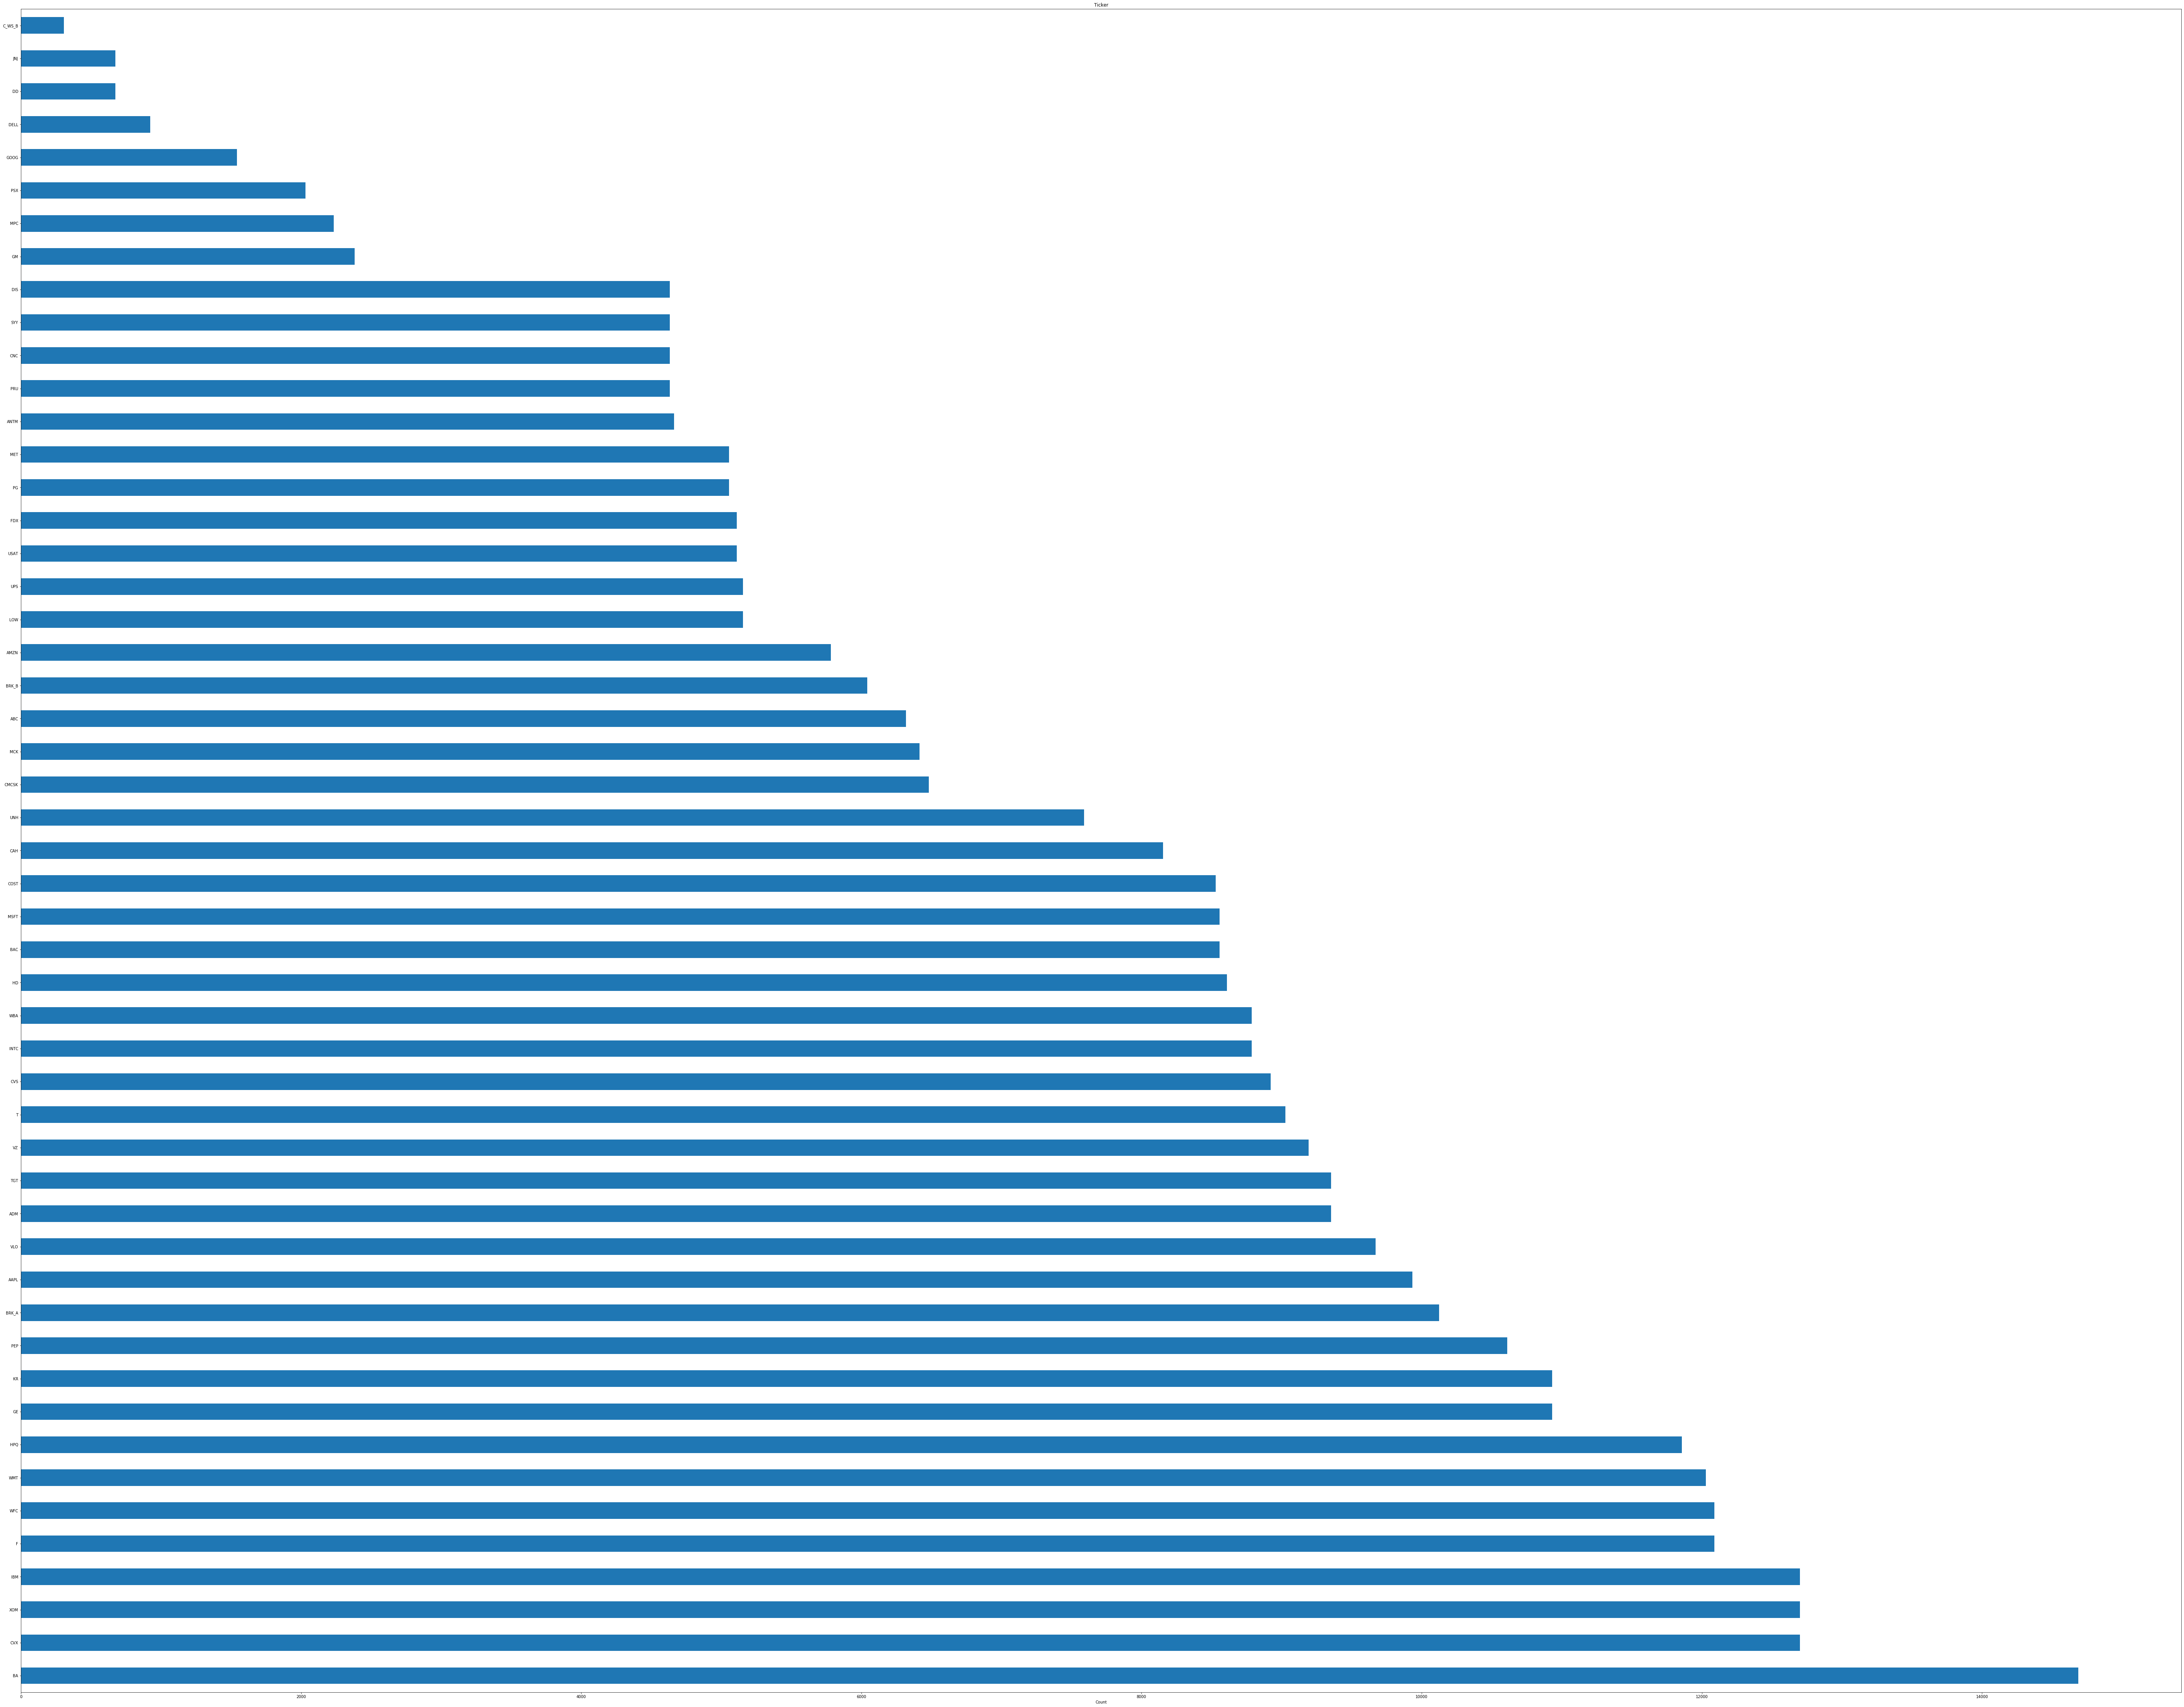

In [22]:
plt = bigframe.Ticker.value_counts().plot(kind='barh', figsize = (100, 80))
plt.set_title('Ticker')
plt.set_xlabel('Count')
plt